In [4]:
import pandas as pd
import numpy as snp
import seaborn as sns
import matplotlib.pyplot as splt

#### Q-3. Consider the ‘Blood Pressure Before’ and ‘Blood Pressure After’ columns from the data and calculate the following
#### https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_
##### a. Measure the dispersion in both and interpret the results.
##### b. Calculate mean and 5% confidence interval and plot it in a graph
##### c. Calculate the Mean absolute deviation and Standard deviation and interpret the results.
##### d. Calculate the correlation coefficient and check the significance of it at 1% level of significance.

In [10]:
df = pd.read_csv('blood.csv')

In [11]:
df

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140
5,6,122,118
6,7,137,129
7,8,130,124
8,9,142,137
9,10,128,125


In [20]:
df.corr()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
Patient ID,1.000000,-0.000818,0.036698
Blood Pressure Before (mmHg),-0.000818,1.000000,0.977949
Blood Pressure After (mmHg),0.036698,0.977949,1.000000


In [23]:
df.columns

Index(['Patient ID', ' Blood Pressure Before (mmHg)',
       ' Blood Pressure After (mmHg)'],
      dtype='object')

In [25]:
df[" Blood Pressure Before (mmHg)"].mean()

133.91

In [27]:
df[' Blood Pressure After (mmHg)'].mean()

128.36

In [29]:
mean1 = df[" Blood Pressure Before (mmHg)"].mean()

In [30]:
mean2 = df[" Blood Pressure After (mmHg)"].mean()

In [32]:
std1 = snp.std(df[" Blood Pressure Before (mmHg)"])

In [33]:
std2 = snp.std(df[" Blood Pressure After (mmHg)"])

In [35]:
std_error1 = std1 / snp.sqrt(len(df[' Blood Pressure Before (mmHg)']))

In [36]:
std_error2 = std2 / snp.sqrt(len(df[' Blood Pressure After (mmHg)']))

In [37]:
margin_of_error1 = 1.96 * std_error1

In [38]:
margin_of_error2 = 1.96 * std_error2

In [39]:
confidence_interval1 = (mean1 - margin_of_error1, mean1 + margin_of_error1)

In [40]:
confidence_interval2 = (mean2 - margin_of_error2, mean2 + margin_of_error2)

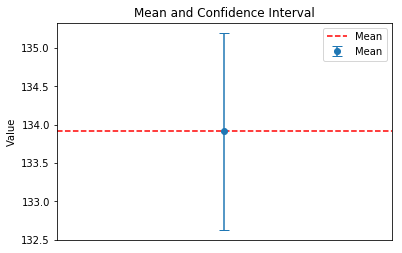

In [42]:
splt.errorbar(0, mean1, yerr=margin_of_error1, fmt='o', capsize=5, label='Mean')
splt.axhline(y=mean1, color='r', linestyle='--', label='Mean')
splt.legend()
splt.title('Mean and Confidence Interval')
splt.ylabel('Value')
splt.xticks([])
splt.show()


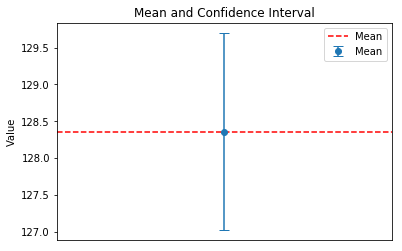

In [44]:
splt.errorbar(0, mean2, yerr=margin_of_error2, fmt='o', capsize=5, label='Mean')
splt.axhline(y=mean2, color='r', linestyle='--', label='Mean')
splt.legend()
splt.title('Mean and Confidence Interval')
splt.ylabel('Value')
splt.xticks([])
splt.show()


#### Q-6. A pharmaceutical company is developing a drug that is supposed to reduce blood pressure. They conduct a clinical trial with 100 patients and record their blood pressure before and after taking the drug. The company wants to know if the change in blood pressure follows a normal distribution.
#### https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_

In [46]:
from scipy.stats import shapiro
s1,p1 = shapiro(df[' Blood Pressure Before (mmHg)'])
print(s1,p1)
if p1>0.05:
    print("normal")
else:
    print("not normal")

0.957322895526886 0.0026030323933809996
not normal


In [47]:
from scipy.stats import shapiro
s2,p2 = shapiro(df[' Blood Pressure After (mmHg)'])
print(s2,p2)
if p2>0.05:
    print("normal")
else:
    print("not normal")

0.940056562423706 0.0001943297975230962
not normal


#### Q-8. The anxiety levels of 10 participants were measured before and after a new therapy. The scores are not normally distributed. Use the Wilcoxon signed-rank test to test whether the therapy had a significant effect on anxiety levels. The data is given below: Participant Before therapy After therapy Difference

In [52]:
from scipy.stats import wilcoxon

before_therapy = [10,8,12,15,6,9,11,7,14,10]
after_therapy = [7,6,10,12,5,8,9,6,12,8]
# Compute the differences
differences = snp.array(after_therapy) - snp.array(before_therapy)

# Perform the Wilcoxon signed-rank test
statistic, p_value = wilcoxon(differences)

# Print the results
print("Wilcoxon signed-rank test:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")
if p_value<0.05:
    print("accepted that the therapy had a significant change")
else:
    print("no change")


Wilcoxon signed-rank test:
Statistic: 0.0
P-value: 0.0043760114523359135
accepted that the therapy had a significant change


#### Q-11. Given the data of a feature contributing to different classes
#### https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_
#### a. Check whether the distribution of all the classes are the same or not.
#### b. Check for the equality of variance/
#### c. Which amount LDA and QDA would perform better on this data for classification and why.
#### d. Check the equality of mean for between all the classes.

In [55]:
from scipy.stats import chi2_contingency
df = df.drop('Patient ID',axis=1)
# Perform the chi-square test of independence
chi2, p, dof, expected = chi2_contingency(df)

# Print the chi-square test statistic, p-value, degrees of freedom, and expected frequencies
print("Chi-square test statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)
if p<0.05:
    print("distribution of the classes is not the same.")
else:
    print("distribution of the classes is same.")

Chi-square test statistic: 0.8748586918399021
p-value: 1.0
Degrees of freedom: 99
Expected frequencies:
 [[127.64517482 122.35482518]
 [141.4308537  135.5691463 ]
 [121.51820643 116.48179357]
 [133.77214321 128.22785679]
 [147.04724139 140.95275861]
 [122.53936783 117.46063217]
 [135.81446601 130.18553399]
 [129.68749762 124.31250238]
 [142.4520151  136.5479849 ]
 [129.17691692 123.82308308]
 [134.79330461 129.20669539]
 [138.8779502  133.1220498 ]
 [131.21923971 125.78076029]
 [143.4731765  137.5268235 ]
 [123.56052923 118.43947077]
 [127.64517482 122.35482518]
 [135.81446601 130.18553399]
 [143.9837572  138.0162428 ]
 [127.64517482 122.35482518]
 [138.3673695  132.6326305 ]
 [135.81446601 130.18553399]
 [131.21923971 125.78076029]
 [126.11343272 120.88656728]
 [129.17691692 123.82308308]
 [143.4731765  137.5268235 ]
 [127.64517482 122.35482518]
 [135.30388531 129.69611469]
 [140.920273   135.079727  ]
 [132.24040111 126.75959889]
 [145.51549929 139.48450071]
 [124.07110992 118.928890

In [57]:
import scipy.stats as stats

# Example data for two groups


# Perform Levene's test
statistic, p_value = stats.levene(df[' Blood Pressure Before (mmHg)'], df[' Blood Pressure After (mmHg)'])

# Print the results
print("Levene's test statistic:", statistic)
print("p-value:", p_value)
if p_value<0.05:
    print("the variances are significantly different")
else:
    print("the variances are same")

Levene's test statistic: 0.18038002140150966
p-value: 0.6715080090945376
the variances are same


In [59]:
import scipy.stats as stats


# Perform one-way ANOVA
statistic, p_value = stats.f_oneway(df[' Blood Pressure Before (mmHg)'],df[' Blood Pressure After (mmHg)'])

# Print the results
print("One-way ANOVA statistic:", statistic)
print("p-value:", p_value)
if p_value<0.05:
    print("at least one pair of means is significantly different")
else:
    print("no change")

One-way ANOVA statistic: 33.85555270599285
p-value: 2.3565868442707578e-08
at least one pair of means is significantly different
